# Homework 5: Logistic Regression and Support Vector Machines

by Natalia Frumkin and Karanraj Chauhan with help from B. Kulis, R. Manzelli, and A. Tsiligkardis

## Problem 1: SVM Toy Example

Given the following two-class data set:

**Class -1: **
A = (1,1)
B = (2,3)

**Class +1: **
C = (2,5)
D = (4,2)

<ol type="a">
  <li>Plot the data.</li>
  <li>Plot the hyperplane described by w = $(3,2)^T, b = -12$</li>
  <li>Calculate the $l_2$ distance of data point C from the hyperplane.</li>
  <li>Determine if the hyperplane linearly separates the data. Explain.</li>
  <li>Calculate the hard margin SVM hyperplane in canonical form.</li>
  <li>Which, if any, data points lie on the SVM hyperplane?</li>
</ol>

(-1.35, 6.35, -0.25354120676968356, 5.324365342163355)

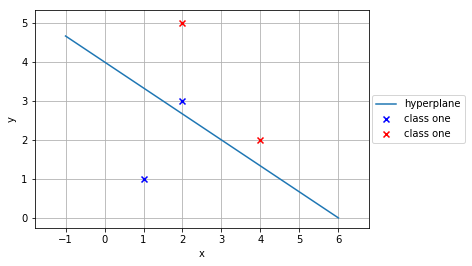

In [25]:
import numpy as np
from matplotlib import pyplot as plt

def scatter_plot(x_axis, y_axis, x_label, y_label, color, marker, name, title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = marker ,label = name, zorder = 3)
    plt.xlabel(x_label)
    plt.grid(zorder=0)
    plt.ylabel(y_label)
    if (title != ''):
        plt.title(title)
        
class_one = [[1,1],[2,3]]
class_two = [[2,5],[4,2]]

x = np.linspace(-1, 6, 100)
w = np.array([3,2])
b = -12
y = 1/3*(12-2*x)
plt.plot(x,y, label = "hyperplane")
scatter_plot([i[0] for i in class_one], [i[1] for i in class_one], 'x', 'y', 'b', 'x', 'class one')
scatter_plot([i[0] for i in class_two], [i[1] for i in class_two], 'x', 'y', 'r', 'x', 'class one')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))
plt.axis('equal')

3.
<br>
$[3,2]*[x,y]^T-12 = 0 \rightarrow 3x+2y-12=0 \rightarrow y = 4-\frac{2}{3}x$
<br>
line perpendicular to the hyperplane must have form of $y = \frac{3}{2}x+b$
<br>
$\rightarrow 5 = \frac{3}{2}*2+b \rightarrow b = 2 \rightarrow y = \frac{3}{2}x+2$
<br>
$\frac{3}{2}x+2 = -\frac{2}{3}x+4 \rightarrow x = \frac{12}{13}, y = \frac{44}{13}$
<br>
$\rightarrow l_2$ distance from C to hyperplane $= \sqrt{(2-\frac{12}{13})^2 + (5-\frac{44}{13})^2} = \frac{7}{\sqrt{13}}$
<br>
4.
<br>
The hyperplane does not linearly seperate the data points as it shows on the graph there are some data points belong to different classes reside on the same side of the hyperplane

## Problem 2: Logistic Regression

<p>In this problem, we will use a logistic regression model to classify emails as "spam" (1) or "non-spam" (0). Recall that the hypothesis/decision rule in a logistic regression model is given by</p>

$$h_\theta(x) = \sigma(\theta^Tx) \\ \text{where } \sigma  \text{ is the sigmoid function}$$

<p>Since logistic regression does not have a closed form solution, we will use gradient descent to obtain the parameters $\theta$. We will use the negative log likelihood loss with L2 regularization as the loss function. Mathematically, the loss function $l(\theta)$ for a given set of parameters $\theta$ will be,</p>

$$l(\theta) = NLL(\theta) + \frac{\lambda}{2}||\theta||^2 \\ \text{where } NLL(\theta) = -\sum_{i=1}^{n} y_i\log(h(x_i)) + (1 - y_i)\log(1 - h(x_i))$$

<p>The good news is, you won't have to worry about these equations for implementing gradient descent (hurray!). However, what you will need is the gradient or the derivative of the loss function. For a given $n$$ x $$d$ matrix $X$ of data, $n$ x $1$ vector of labels (0/1) $y$, and corresponding $n$ x $1$ vector of predictions $\hat{y}$, the loss function gradient is</p>

$$\nabla l(\theta) = (\hat{y} - y)^{T} \cdot X + \lambda \cdot \theta$$

<ol type="a">
    <li>Load the dataset file spambase_data.csv using pandas, and then split the dataset into a train set and a test set. Note: train/test ratio of 0.8/0.2 has been known to work, but you are welcome to try other values.</li>
    <li>Using the loss gradient equation above, implement gradient descent (use only the train set for this) to find the parameters $\theta$ of the logistic regression model. Note: $learning$ $rate = 0.00001$, $\lambda$ = $10$, and $number$ $of$ $steps = 3000$ have been known to give a decent accuracy but you are welcome to try other values, especially for $number$ $of$ $steps$.</li>
    <li>Report the correct classification rate (CCR) of the model on train data and test data. The CCR is defined as $$CCR = \frac{num\_correct\_predictions}{num\_samples}$$</li>   
</ol>

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
# read in raw dataset
spam_df = pd.read_csv('spambase_data.csv', index_col=0)
# split into train and test sets
train, test = train_test_split(spam_df, test_size=0.2)

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,,,,,,,,,,,,,,,,,,,,,
0.00,0.00,0.24,0.0,0.72,0.00,0.00,0.00,0.48,0.00,0.00,...,0.000,0.000,0.000,0.328,0.000,0.000,1.740,48,141,1
0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
0.05,0.07,0.10,0.0,0.76,0.05,0.15,0.02,0.55,0.00,0.10,...,0.042,0.101,0.016,0.250,0.046,0.059,2.565,66,2258,1
0.00,0.00,1.15,0.0,0.38,0.38,0.00,0.00,0.00,0.00,0.00,...,0.000,0.196,0.000,0.261,0.000,0.000,5.666,56,272,1
0.00,0.19,0.39,0.0,0.00,0.00,0.19,0.00,0.00,0.00,0.00,...,0.000,0.030,0.000,0.152,0.000,0.000,1.357,19,148,1
0.00,0.00,3.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.289,0.000,3.768,0.000,0.000,4.833,29,87,1
0.00,0.00,2.12,0.0,1.06,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.238,4,26,0
0.00,0.33,0.33,0.0,1.65,0.33,0.66,0.00,0.00,0.16,0.16,...,0.000,0.024,0.074,0.248,0.049,0.049,6.161,350,727,1
0.05,0.00,0.31,0.0,0.00,0.05,0.00,0.05,0.47,0.00,0.00,...,0.112,0.202,0.067,0.000,0.014,0.000,3.117,52,1303,0


In [33]:
# fit logistic regression model
theta = 0.5
# for i in range(3000):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-33-670af53dcb97>, line 4)

In [12]:
# predict on test data and train data and calculate CCR

Test ccr = 0.67970, Train ccr = 0.69158
